In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
marks_df = pd.read_csv("./data/CSC_marks_2019_to_2023.csv")
marks_df

,Unnamed: 0,Unnamed: 1,CSC1010H,CSC1011H,CSC1015F,CSC1016S,CSC1017F,CSC1019F,CSC2001F,CSC2002S,CSC2004Z,CSC3002F,CSC3003S
0,2019,Pass,48,17,556,424,299,0,221,200,182,151,142
1,2019,DNF,2,3,10,41,27,0,2,13,7,5,11
2,2019,Fail,27,6,110,96,51,0,41,32,40,17,28
3,2020,Pass,33,29,906,491,22,123,292,256,0,164,165
4,2020,DNF,4,1,14,57,2,1,8,10,1,2,9
5,2020,Fail,17,5,13,147,1,1,19,61,0,2,8
6,2021,Pass,31,10,847,467,27,122,287,225,504,173,158
7,2021,DNF,1,1,22,30,9,2,6,13,8,12,6
8,2021,Fail,18,14,102,196,7,16,96,131,78,34,52
9,2022,Pass,70,16,748,514,19,137,334,274,235,179,167


In [34]:
marks_df.rename(columns={"Unnamed: 0": "Year", "Unnamed: 1": "Grade"}, inplace=True)
marks_df

,Year,Grade,CSC1010H,CSC1011H,CSC1015F,CSC1016S,CSC1017F,CSC1019F,CSC2001F,CSC2002S,CSC2004Z,CSC3002F,CSC3003S
0,2019,Pass,48,17,556,424,299,0,221,200,182,151,142
1,2019,DNF,2,3,10,41,27,0,2,13,7,5,11
2,2019,Fail,27,6,110,96,51,0,41,32,40,17,28
3,2020,Pass,33,29,906,491,22,123,292,256,0,164,165
4,2020,DNF,4,1,14,57,2,1,8,10,1,2,9
5,2020,Fail,17,5,13,147,1,1,19,61,0,2,8
6,2021,Pass,31,10,847,467,27,122,287,225,504,173,158
7,2021,DNF,1,1,22,30,9,2,6,13,8,12,6
8,2021,Fail,18,14,102,196,7,16,96,131,78,34,52
9,2022,Pass,70,16,748,514,19,137,334,274,235,179,167


In [35]:
marks_df.dtypes

Year         int64
Grade       object
CSC1010H     int64
CSC1011H     int64
CSC1015F     int64
CSC1016S     int64
CSC1017F     int64
CSC1019F     int64
CSC2001F     int64
CSC2002S     int64
CSC2004Z     int64
CSC3002F     int64
CSC3003S     int64
dtype: object

In [36]:
columns_to_standardize = marks_df.columns[2:]
columns_to_standardize

# Min-Max scaling function
def min_max_scaling(column):
    min_val = column.min()
    max_val = column.max()
    scaled_column = (column - min_val) / (max_val - min_val)
    return scaled_column

In [37]:
# Standardize all columns at once
marks_df_scaled = marks_df.iloc[:, 2:].apply(min_max_scaling)
marks_df_scaled = pd.concat([marks_df.iloc[0:, :2], marks_df_scaled], axis=1)
marks_df_scaled

,Year,Grade,CSC1010H,CSC1011H,CSC1015F,CSC1016S,CSC1017F,CSC1019F,CSC2001F,CSC2002S,CSC2004Z,CSC3002F,CSC3003S
0,2019,Pass,0.676056,0.586207,0.609375,0.823529,1.000000,0.000000,0.660661,0.642384,0.361111,0.655022,0.613043
1,2019,DNF,0.028169,0.103448,0.000000,0.072549,0.087248,0.000000,0.003003,0.023179,0.013889,0.017467,0.043478
2,2019,Fail,0.380282,0.206897,0.111607,0.180392,0.167785,0.000000,0.120120,0.086093,0.079365,0.069869,0.117391
3,2020,Pass,0.464789,1.000000,1.000000,0.954902,0.070470,0.831081,0.873874,0.827815,0.000000,0.711790,0.713043
4,2020,DNF,0.056338,0.034483,0.004464,0.103922,0.003356,0.006757,0.021021,0.013245,0.001984,0.004367,0.034783
5,2020,Fail,0.239437,0.172414,0.003348,0.280392,0.000000,0.006757,0.054054,0.182119,0.000000,0.004367,0.030435
6,2021,Pass,0.436620,0.344828,0.934152,0.907843,0.087248,0.824324,0.858859,0.725166,1.000000,0.751092,0.682609
7,2021,DNF,0.014085,0.034483,0.013393,0.050980,0.026846,0.013514,0.015015,0.023179,0.015873,0.048035,0.021739
8,2021,Fail,0.253521,0.482759,0.102679,0.376471,0.020134,0.108108,0.285285,0.413907,0.154762,0.144105,0.221739
9,2022,Pass,0.985915,0.551724,0.823661,1.000000,0.060403,0.925676,1.000000,0.887417,0.466270,0.777293,0.721739


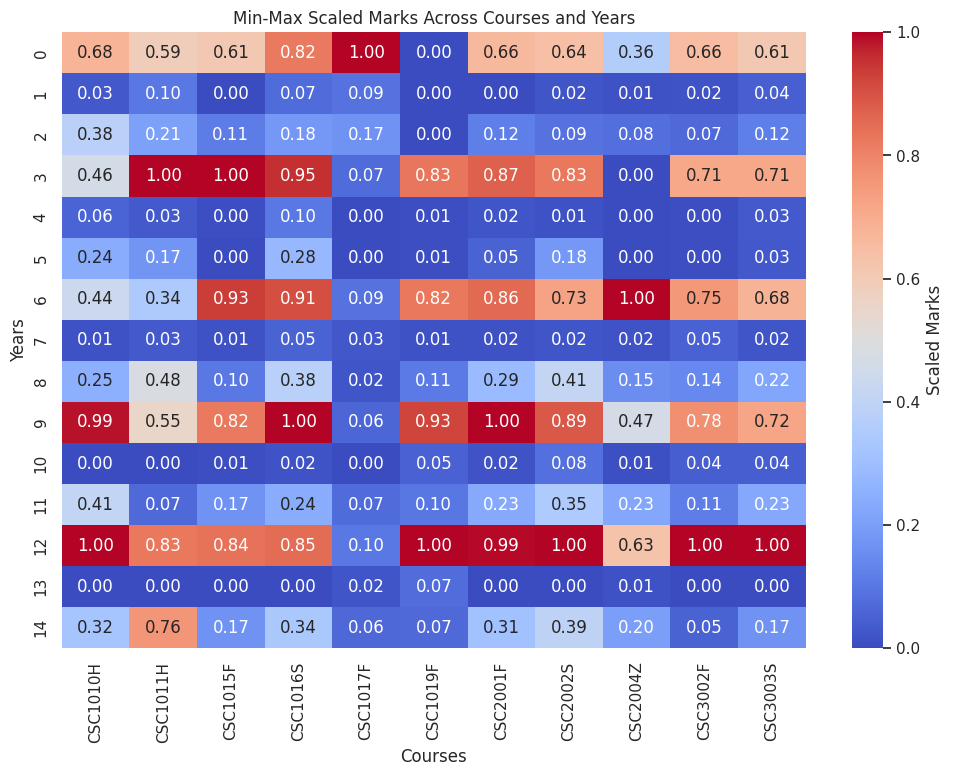

In [38]:
# Set the style for seaborn
sns.set_theme(style="whitegrid")

# Plotting the data
plt.figure(figsize=(12, 8))

# Use seaborn's heatmap for better visualization
sns.heatmap(marks_df_scaled.iloc[:, 2:], annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={'label': 'Scaled Marks'})

# Set the title and labels
plt.title('Min-Max Scaled Marks Across Courses and Years')
plt.xlabel('Courses')
plt.ylabel('Years')

# Show the plot
plt.show()

In [39]:
marks_df_scaled.to_csv("./out/marks.csv", index=False)